In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [27]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [28]:
tf.test.is_built_with_cuda()

False

In [29]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
y_train.shape

(50000, 1)

In [33]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [46]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

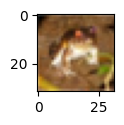

In [47]:
plot_sample(0)

In [51]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes[y_train[0][0]]

'frog'

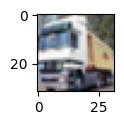

In [53]:
plot_sample(1)

In [64]:
classes[y_train[1][0]]

'truck'

In [67]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train_scaled.shape

(50000, 32, 32, 3)

In [68]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [69]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy', #because of one hot encoding, else it would be sparse_categorical_crossentropy
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 82s 52ms/step - loss: 1.8130 - accuracy: 0.3546
Epoch 2/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6217 - accuracy: 0.4267
Epoch 3/50
1563/1563 [==============================] - 57s 37ms/step - loss: 1.5395 - accuracy: 0.4586
Epoch 4/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4822 - accuracy: 0.4799
Epoch 5/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4319 - accuracy: 0.4974
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3896 - accuracy: 0.5112
Epoch 7/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3502 - accuracy: 0.5273
Epoch 8/50
1563/1563 [==============================] - 57s 37ms/step - loss: 1.3160 - accuracy: 0.5367
Epoch 9/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.2822 - accuracy: 0.5520
Epoch 10/50
1563/1563 [==============================] - 56s 36m

In [84]:
classes[np.argmax(model.predict(X_test_scaled)[7])]

313/313 [==============================] - 2s 7ms/step


'frog'

In [85]:
classes[y_test[7][0]]

'frog'